In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing, model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import math
import os

In [2]:
sns.set(rc = {"figure.figsize":(10, 6)}) #graph size

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [24]:
pwd

'C:\\Users\\os'

In [25]:
df = pd.read_csv("coffee.csv")

In [26]:
df.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-03,122.25,124.00,116.10,116.50,6640,USD
1,2000-01-04,116.25,120.50,115.75,116.25,5492,USD
2,2000-01-05,115.00,121.00,115.00,118.60,6165,USD
3,2000-01-06,119.00,121.40,116.50,116.85,5094,USD
4,2000-01-07,117.25,117.75,113.80,114.15,6855,USD


In [27]:
df.tail()

,Date,Open,High,Low,Close,Volume,Currency
5683,2022-06-06,233.60,240.45,232.85,237.55,27694,USD
5684,2022-06-07,235.40,238.65,230.75,232.15,28721,USD
5685,2022-06-08,233.00,234.60,229.85,231.85,21824,USD
5686,2022-06-09,231.25,235.70,230.30,234.65,23006,USD
5687,2022-06-10,234.00,235.45,227.80,228.90,38907,USD


In [28]:
df.shape

(5688, 7)

In [29]:
df.describe().style.background_gradient(cmap = "cubehelix")

,Open,High,Low,Close,Volume
count,5688.000000,5688.000000,5688.000000,5688.000000,5688.000000
mean,126.300338,127.863671,124.835689,126.246287,8783.465190
std,49.896270,50.475442,49.194648,49.827782,9612.154780
min,41.500000,42.000000,41.500000,41.500000,0.000000
25%,98.500000,99.737500,97.487500,98.350000,61.000000
50%,119.975000,121.200000,118.625000,119.900000,6986.000000
75%,143.262500,144.512500,141.500000,143.050000,14471.000000
max,305.300000,306.250000,304.000000,304.900000,62045.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5688 entries, 0 to 5687
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5688 non-null   object 
 1   Open      5688 non-null   float64
 2   High      5688 non-null   float64
 3   Low       5688 non-null   float64
 4   Close     5688 non-null   float64
 5   Volume    5688 non-null   int64  
 6   Currency  5688 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 311.2+ KB


In [31]:
fig = go.Figure(go.Candlestick(x = df["Date"],
    open = df["Open"], high = df["High"],
    low = df["Low"], close = df["Close"]))

fig.update_layout(xaxis_title = "Year", yaxis_title = "USD", title = "Daily Coffee Price")
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 17))

fig.show()

In [32]:
df0 = df.copy()

In [33]:
X = df0[["Low"]]
y = df0[["Close"]]

In [34]:
# Creating Train Test Split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 31)

In [35]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = lr.predict(X_test)

In [37]:
accuracy = lr.score(X_test, y_test)
print("Linear Regression Accuracy:",accuracy)

Linear Regression Accuracy: 0.9985750103277232


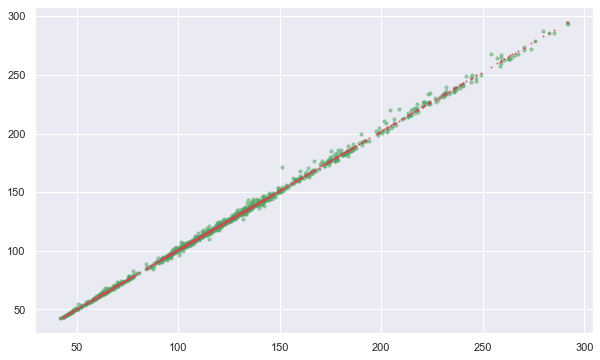

In [38]:
plt.scatter(X_test, y_test, s = 10, c = 'g', alpha = 0.5)
plt.scatter(X_test, y_pred, s = 1, c = 'r', alpha = 0.75)

plt.show()

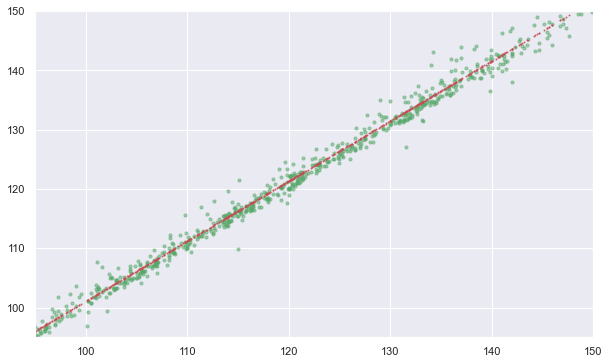

In [39]:
plt.scatter(X_test, y_test, s = 10, c = 'g', alpha = 0.5)
plt.scatter(X_test, y_pred, s = 1, c = 'r', alpha = 0.75)

plt.xlim(95, 150)
plt.ylim(95, 150)

plt.show()

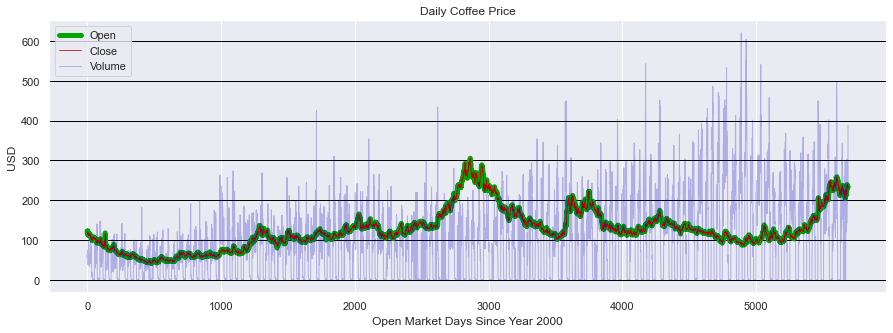

In [40]:
df["Vol"] = df["Volume"]/100

df["Open"].plot(label = "Open", color = "#00A505", linewidth = 5, figsize = (15,5))
df["Close"].plot(label = "Close", color = "#C00000", linewidth = 0.75, figsize = (15,5))
df["Vol"].plot(label = "Volume", color = "#0000C0", alpha = 0.25, linewidth = 1, figsize = (15,5))

plt.grid(axis = "y", color = "#000000")
plt.title("Daily Coffee Price")
plt.xlabel("Open Market Days Since Year 2000")
plt.ylabel("USD")
plt.legend(loc = 2)
plt.show()

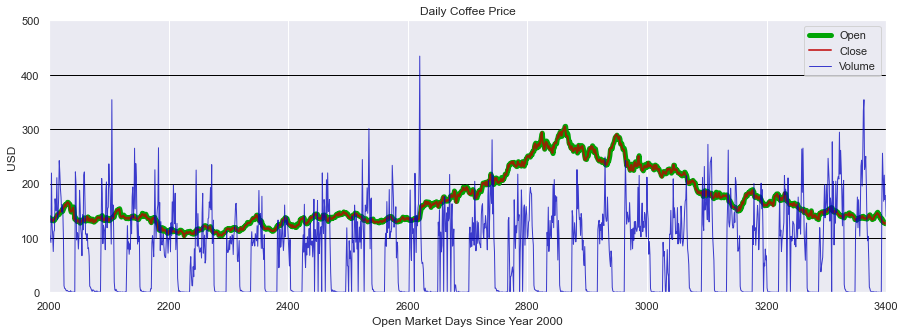

In [41]:
df["Vol"] = df["Volume"]/100

df["Open"].plot(label = "Open", color = "#00A505", linewidth = 5, figsize = (15,5))
df["Close"].plot(label = "Close", color = "#C00000", linewidth = 2, alpha = 0.75, figsize = (15,5))
df["Vol"].plot(label = "Volume", color = "#0000C0", alpha = 0.75, linewidth = 1, figsize = (15,5))

plt.grid(axis = "y", color = "#000000")
plt.title("Daily Coffee Price")
plt.xlabel("Open Market Days Since Year 2000")
plt.ylabel("USD")
plt.xlim(2000, 3400)
plt.ylim(0, 500)
plt.legend(loc = 1)
plt.show()

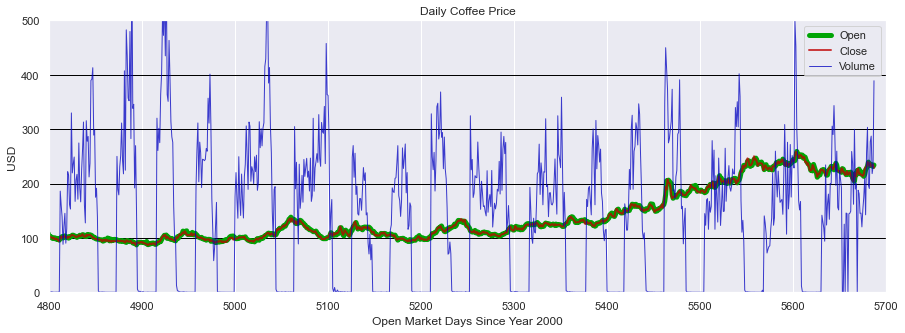

In [42]:
df["Vol"] = df["Volume"]/100

df["Open"].plot(label = "Open", color = "#00A505", linewidth = 5, figsize = (15,5))
df["Close"].plot(label = "Close", color = "#C00000", linewidth = 2, alpha = 0.75, figsize = (15,5))
df["Vol"].plot(label = "Volume", color = "#0000C0", alpha = 0.75, linewidth = 1, figsize = (15,5))

plt.grid(axis = "y", color = "#000000")
plt.title("Daily Coffee Price")
plt.xlabel("Open Market Days Since Year 2000")
plt.ylabel("USD")
plt.xlim(4800, 5700)
plt.ylim(0, 500)
plt.legend(loc = 1)
plt.show()

In [43]:
fig = px.scatter(df, x = "Date", y = "Volume", color = "Volume", color_continuous_scale = "Turbid",
                 opacity = 0.75, title = "Trading Volume of Coffee")

fig.update_traces(marker = dict(size = 4.5, line = dict(width = 0.75, color = "#000000")))
fig.update_layout(xaxis_title = "Year")
fig.show()

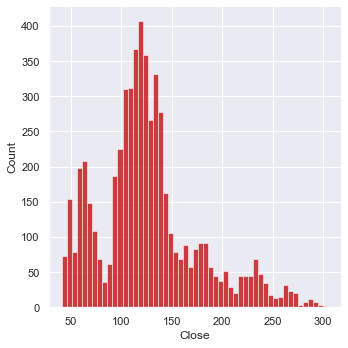

In [44]:
sns.displot(df["Close"], color = "#C00000")